In [1]:
# Analysis and Visualisation 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24352\2945004344.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

In [8]:
df = pd.read_csv("archive(03)\exams.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\e'
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24352\2598051599.py:1: SyntaxWarning: invalid escape sequence '\e'
  df = pd.read_csv("archive(03)\exams.csv")


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [9]:
df.shape

(1000, 8)

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [11]:
df["mean score"] = ((df["math score"] + df["reading score"] + df["writing score"]) / 3).round()
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
0,male,group A,high school,standard,completed,67,67,63,66.0
1,female,group D,some high school,free/reduced,none,40,59,55,51.0
2,male,group E,some college,free/reduced,none,59,60,50,56.0
3,male,group B,high school,standard,none,77,78,68,74.0
4,male,group E,associate's degree,standard,completed,78,73,68,73.0


In [12]:
df['gender'].value_counts()

gender
male      517
female    483
Name: count, dtype: int64

In [13]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
df['gender'] = lc.fit_transform(df['gender'])
df['race/ethnicity'] = lc.fit_transform(df['race/ethnicity'])
df['parental level of education'] = lc.fit_transform(df['parental level of education'])
df['lunch'] = lc.fit_transform(df['lunch'])
df['test preparation course'] = lc.fit_transform(df['test preparation course'])
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
0,1,0,2,1,0,67,67,63,66.0
1,0,3,5,0,1,40,59,55,51.0
2,1,4,4,0,1,59,60,50,56.0
3,1,1,2,1,1,77,78,68,74.0
4,1,4,0,1,0,78,73,68,73.0


In [15]:
import seaborn as sns

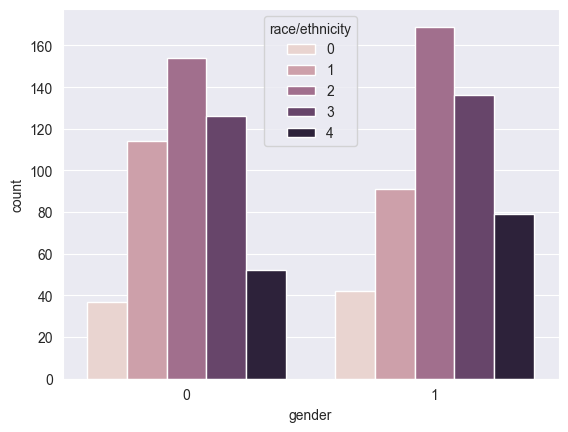

In [35]:
# Analysing Gender and Race
#sns.countplot(df['gender'],hue=df['race/ethnicity'])
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing 'gender' and 'race/ethnicity' columns
sns.countplot(data=df, x='gender', hue='race/ethnicity')
plt.show()


In [17]:
# Analysing Test Preparation Course
df['test preparation course'].value_counts()

test preparation course
1    665
0    335
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1682eb5ee70>,
 [Text(-0.5450045996867513, 0.955494629142563, 'None'),
  Text(0.5450046891466118, -0.9554945781155461, 'Completed')])

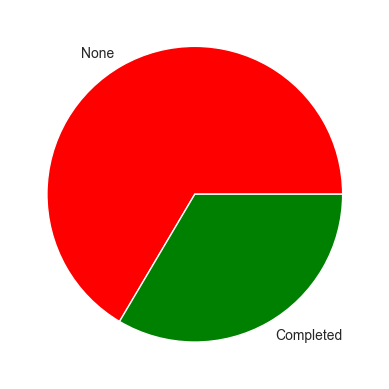

In [18]:
labels = ['None', 'Completed']
colors = ['red', 'green']
plt.pie(df['test preparation course'].value_counts() , labels = labels, colors = colors)

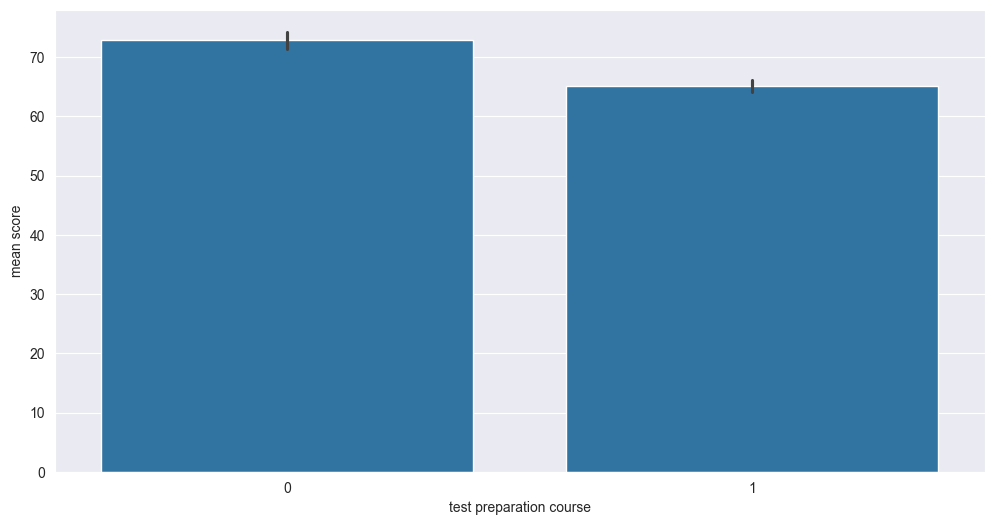

In [19]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'test preparation course', y = 'mean score', data = df)
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24352\2699386646.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df['lunch'], y = df['mean score'], palette = 'inferno')


<Axes: xlabel='lunch', ylabel='mean score'>

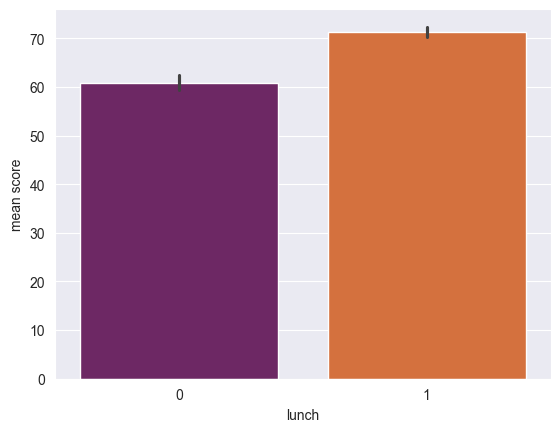

In [20]:
# Analysing Lunch
sns.barplot(x = df['lunch'], y = df['mean score'], palette = 'inferno')

<Axes: xlabel='parental level of education', ylabel='mean score'>

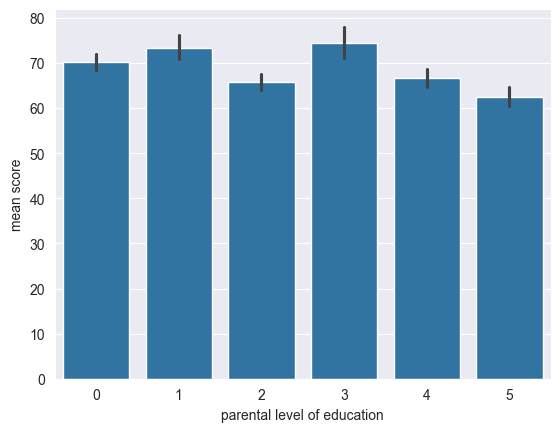

In [21]:
# Analysing parental level of education
sns.barplot(x = 'parental level of education', y = 'mean score', data = df)

<Figure size 1200x600 with 0 Axes>

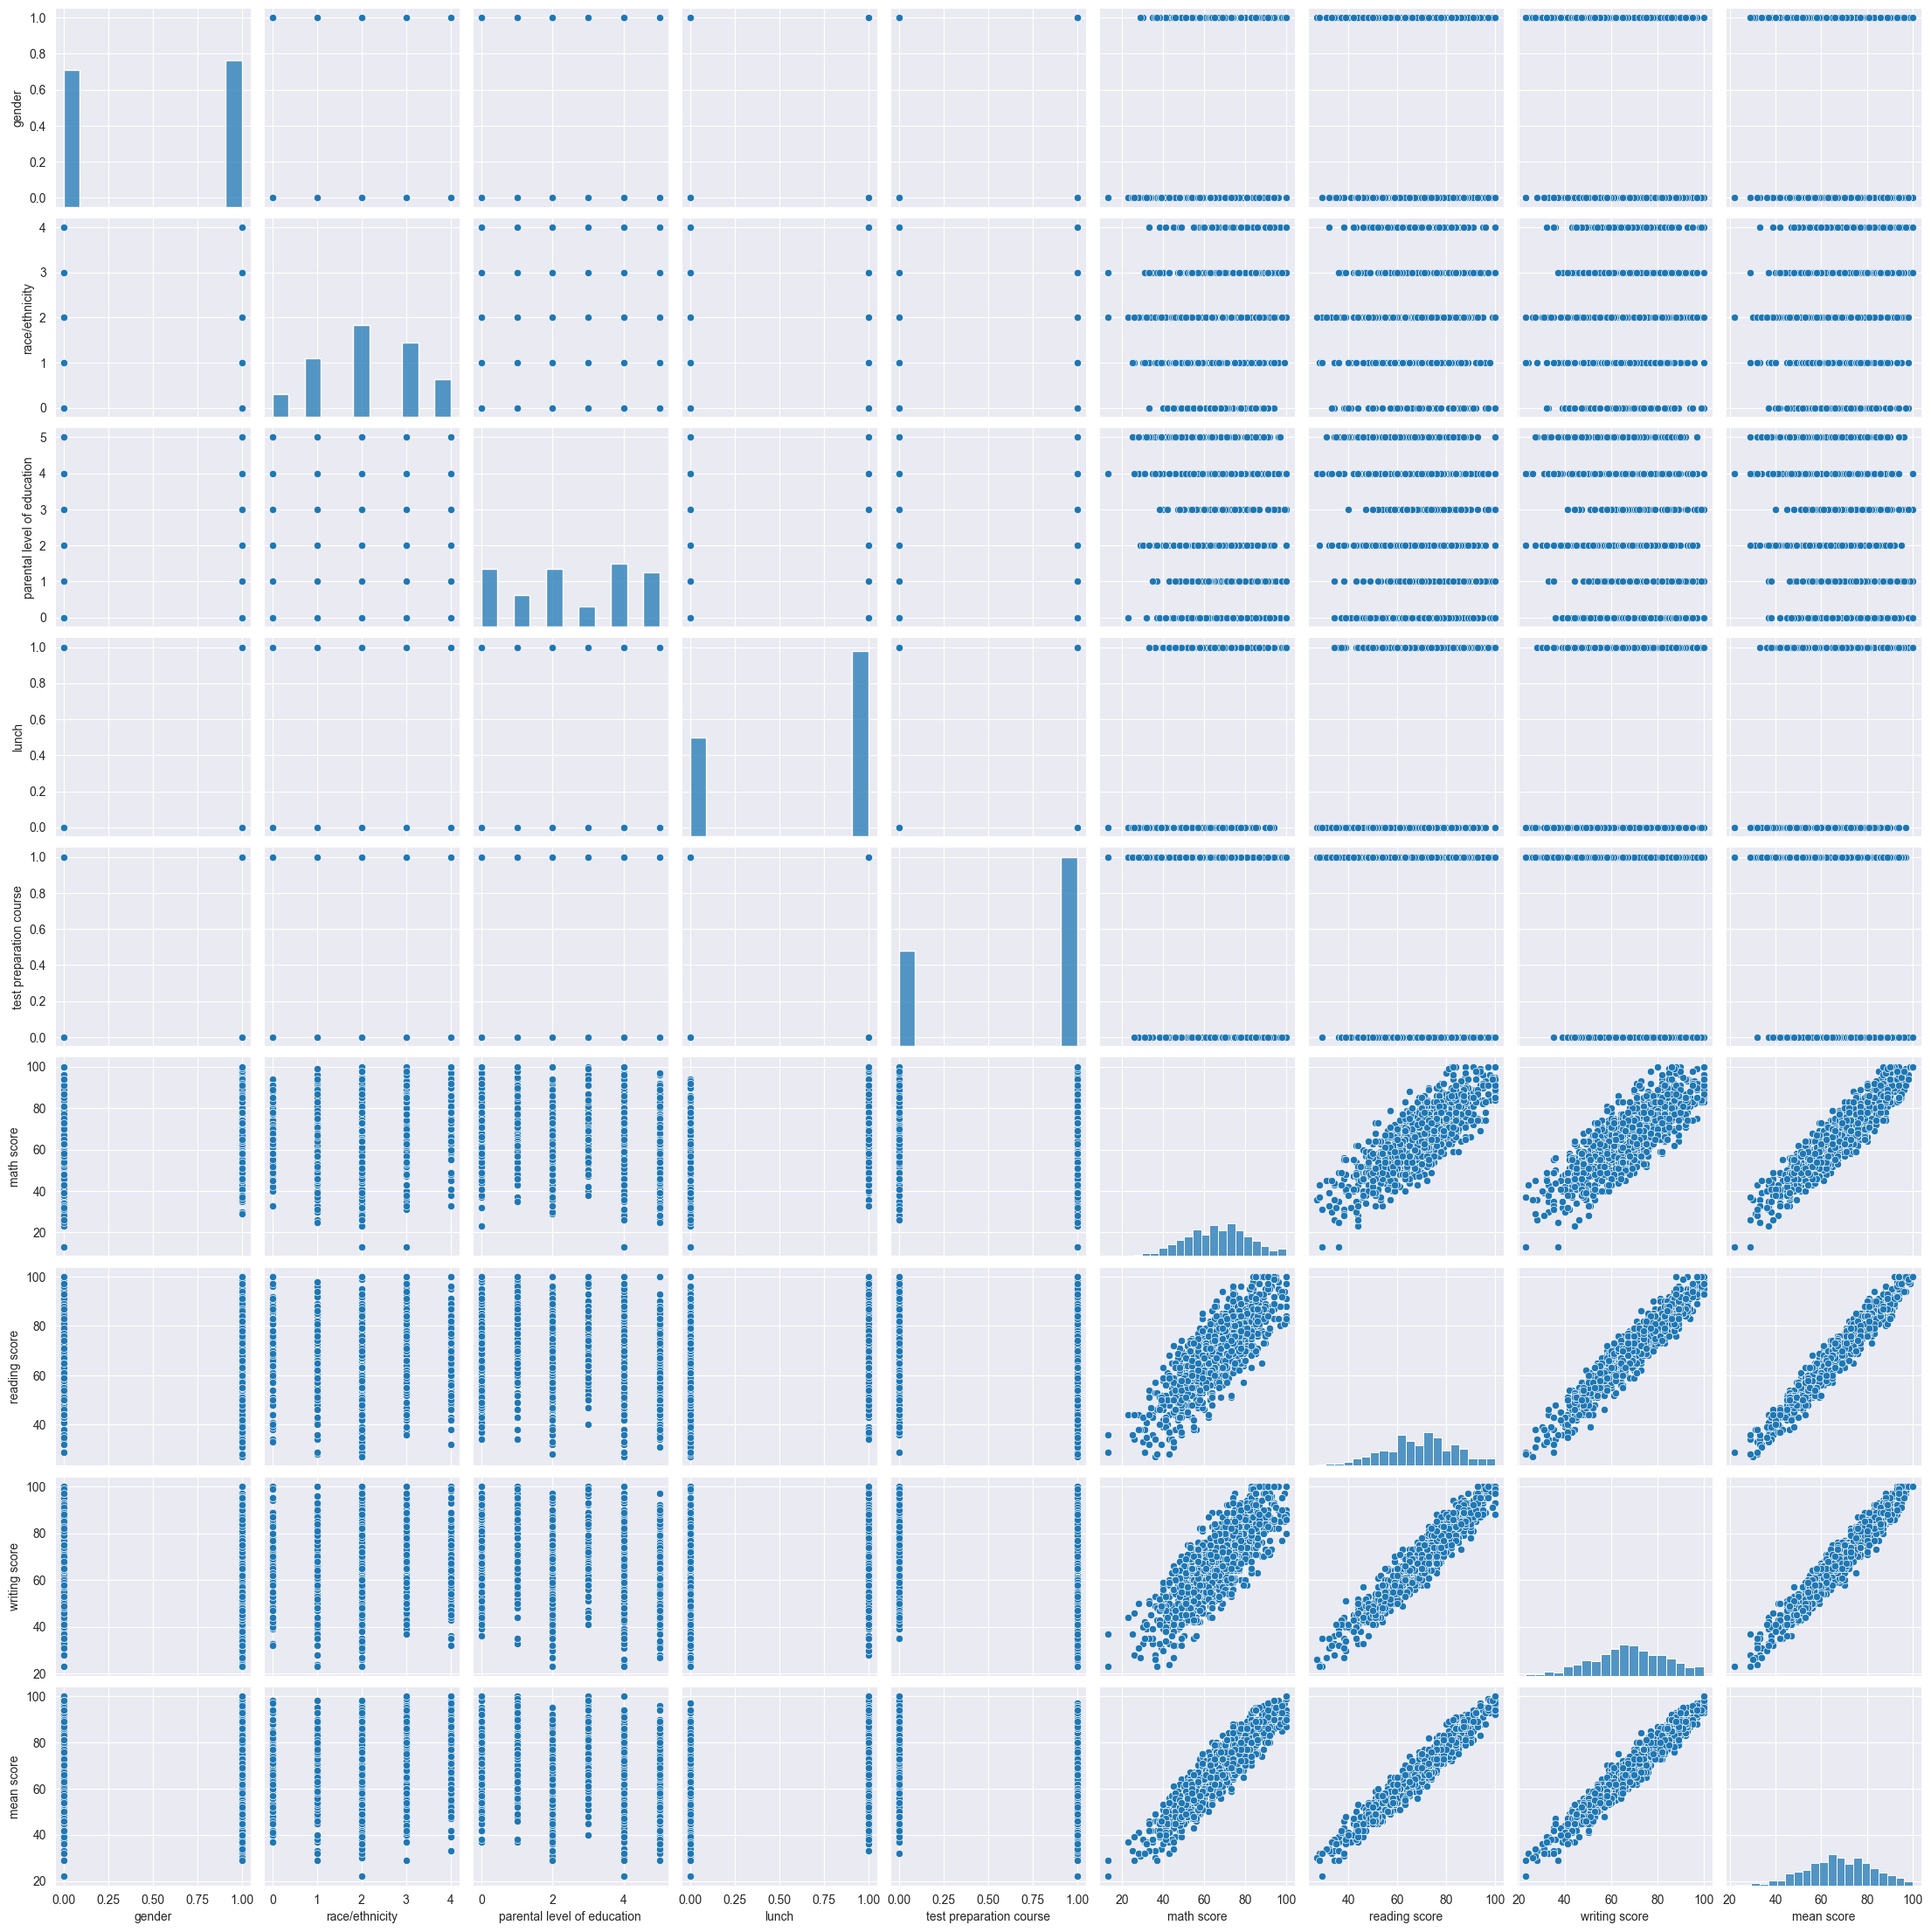

In [22]:
plt.figure(figsize = (12,6))
sns.pairplot(df)
plt.show()

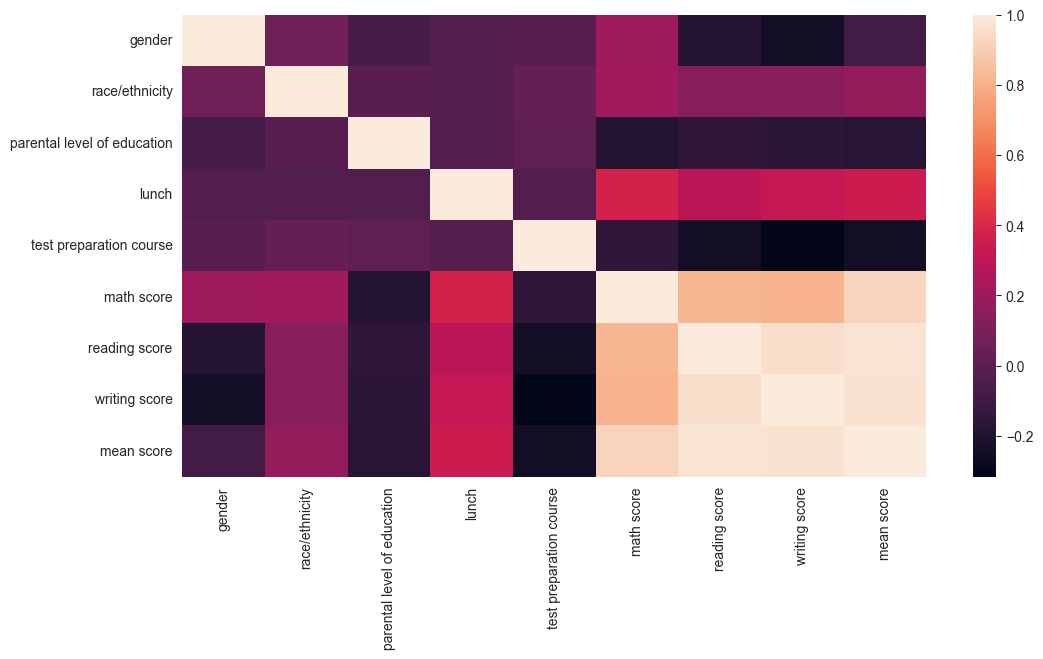

In [23]:
plt.figure(figsize = (12,6))
sns.heatmap(df.corr())
plt.show()

In [24]:
# Data Preprocessing
df = df.drop(['math score', 'writing score', 'reading score'],axis = 1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mean score
0,1,0,2,1,0,66.0
1,0,3,5,0,1,51.0
2,1,4,4,0,1,56.0
3,1,1,2,1,1,74.0
4,1,4,0,1,0,73.0


In [25]:
from sklearn.model_selection import train_test_split
y = df['mean score']
x = df.drop(['mean score'], axis  = 1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [26]:
# Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [28]:
model.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [29]:
predictions = model.predict(x_test)

In [30]:
difference = abs(predictions - y_test)

In [31]:
difference.mean()

12.155